# **Linear Regression**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("community_health_MLR.csv")

In [3]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,0,3,111.0,165.0,28
1,26,1,2,127.0,168.0,23
2,26,1,1,90.0,173.0,14
3,39,1,2,107.0,185.0,21
4,55,1,0,90.0,155.0,27
...,...,...,...,...,...,...
995,43,0,4,123.0,173.0,22
996,34,0,3,111.0,193.0,16
997,54,0,1,140.0,190.0,27
998,38,1,4,29.0,190.0,7


## *About Data*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1000 non-null   int64  
 1   gender          1000 non-null   int64  
 2   race/ethnicity  1000 non-null   int64  
 3   weight          1000 non-null   float64
 4   height          1000 non-null   float64
 5   visits          1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,45.019,14.839166,0.0,36.0,45.0,55.0,89.0
gender,1000.0,0.481,0.499889,0.0,0.0,0.0,1.0,1.0
race/ethnicity,1000.0,2.155,1.148170,0.0,1.0,2.0,3.0,4.0
weight,1000.0,89.574,23.759736,20.0,74.0,89.0,106.0,160.0
height,1000.0,170.914,15.947694,117.0,160.0,170.0,183.0,218.0
visits,1000.0,19.956,6.455055,2.0,15.0,20.0,24.0,40.0


In [6]:
df.isna()

,age,gender,race/ethnicity,weight,height,visits
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [7]:
df.isna().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

## *Data Preparition*

**Adding BMI**

In [8]:
df["bmi"] = round(df["weight"] / (df["height"] / 100) ** 2, 2)

In [9]:
df.head()

,age,gender,race/ethnicity,weight,height,visits,bmi
0,47,0,3,111.0,165.0,28,40.77
1,26,1,2,127.0,168.0,23,45.00
2,26,1,1,90.0,173.0,14,30.07
3,39,1,2,107.0,185.0,21,31.26
4,55,1,0,90.0,155.0,27,37.46


In [10]:
# save the dataframe
df.to_csv("community_healty_with_bmi.csv")

In [11]:
df.corr()

,age,gender,race/ethnicity,weight,height,visits,bmi
age,1.000000,0.023866,0.009756,-0.084586,-0.063454,0.539543,-0.041481
gender,0.023866,1.000000,0.030425,0.272045,0.296501,0.066747,0.051005
race/ethnicity,0.009756,0.030425,1.000000,0.018091,0.031233,0.006324,-0.005990
weight,-0.084586,0.272045,0.018091,1.000000,0.141370,0.543433,0.772455
height,-0.063454,0.296501,0.031233,0.141370,1.000000,-0.386140,-0.493038
visits,0.539543,0.066747,0.006324,0.543433,-0.386140,1.000000,0.723839
bmi,-0.041481,0.051005,-0.005990,0.772455,-0.493038,0.723839,1.000000


## *Train Test Split*

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop("visits", axis= 1)
y = df["visits"]

In [14]:
X.head()

,age,gender,race/ethnicity,weight,height,bmi
0,47,0,3,111.0,165.0,40.77
1,26,1,2,127.0,168.0,45.00
2,26,1,1,90.0,173.0,30.07
3,39,1,2,107.0,185.0,31.26
4,55,1,0,90.0,155.0,37.46


In [15]:
y.head()

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [17]:
X_train.head()

,age,gender,race/ethnicity,weight,height,bmi
916,43,1,3,41.0,168.0,14.53
234,48,1,2,75.0,168.0,26.57
711,23,0,3,96.0,183.0,28.67
532,56,0,2,72.0,163.0,27.10
289,50,1,2,78.0,178.0,24.62


In [18]:
X_test.head()

,age,gender,race/ethnicity,weight,height,bmi
890,72,1,1,87.0,175.0,28.41
983,47,0,1,79.0,183.0,23.59
107,16,0,1,107.0,170.0,37.02
609,34,0,1,61.0,168.0,21.61
113,50,1,1,132.0,170.0,45.67


In [19]:
y_train.head()

916    11
234    21
711    13
532    18
289    16
Name: visits, dtype: int64

In [20]:
y_test.head()

890    25
983    20
107    19
609    16
113    29
Name: visits, dtype: int64

## *Scikit Learn*

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regr = LinearRegression()

In [23]:
regr.fit(X_train, y_train)

LinearRegression()

## *Prediction*

In [24]:
test_pred = regr.predict(X_test)

In [25]:
test_pred

array([25.23916354, 16.57651671, 15.58461484, 12.19852668, 28.4951401 ,
       12.26422789, 18.4299277 , 14.60361972, 26.05268875, 16.32655633,
       13.64762321, 17.15372525, 17.20686126, 14.44339639, 28.05682424,
       11.89391615, 17.58091501, 21.55707995, 24.42916087, 12.58798275,
       11.55173052, 31.21067344, 20.09222854, 16.85964674, 22.25020538,
       22.72268746, 21.95906609, 14.72706037, 32.77047188, 16.17908377,
       18.06680977, 28.00108529, 22.57066194, 30.41600464, 27.20368819,
       13.99910749, 18.24243361, 20.66992265, 10.87180702, 24.51039359,
       18.90815838, 18.46032454, 24.65314137, 20.72472141, 13.22410632,
       17.07071546, 24.57703239,  8.7292943 , 19.80957485, 30.10016728,
       20.47117229, 24.08203512, 23.19812357, 16.50277629,  8.64686536,
       17.73121237, 14.5710119 , 17.11439934, 30.58895194, 20.67187436,
       21.55996554, 18.69893487, 13.04667602, 24.48759419, 17.82970734,
       14.48983168, 19.22161736, 13.93648482, 15.86768444, 36.76

## *Performance*

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
print("Theta     : ", round(regr.coef_[0], 2))
print("Intercept : ", round(regr.intercept_, 2))
print("R^2       : ", round(r2_score(y_test, test_pred), 2))
print("MAE       : ", round(mean_absolute_error(y_test, test_pred), 2))
print("RMSE      : ", round(np.sqrt(mean_squared_error(y_test, test_pred)), 2))

Theta     :  0.25
Intercept :  -7.05
R^2       :  0.86
MAE       :  2.1
RMSE      :  2.46


## *Final*

In [28]:
final = LinearRegression()

In [29]:
final.fit(X, y)

LinearRegression()

In [30]:
y_hat = final.predict(X)

In [31]:
coef_df = pd.DataFrame(final.coef_, X.columns, columns=["Coeficcients"])

In [32]:
coef_df

,Coeficcients
age,0.248793
gender,0.098953
race/ethnicity,0.024083
weight,0.008431
height,-0.000034
bmi,0.481693


## *Example*

In [33]:
print(df["age"].mean())
print(df["gender"].mean())
print(df["race/ethnicity"].mean())
print(df["weight"].mean())
print(df["height"].mean())
print(df["bmi"].mean())

45.019
0.481
2.155
89.574
170.914
31.27152


In [34]:
exp = [[22, 0, 1, 43, 157, 43 / (1.57 ** 2)]]

In [35]:
final.predict(exp)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.10126233])

In [36]:
X.iloc[44]

age                43.00
gender              1.00
race/ethnicity      1.00
weight             82.00
height            193.00
bmi                22.01
Name: 44, dtype: float64

In [37]:
exp_1 = [[43, 1, 1, 82, 193, 22.01]]

In [38]:
exp_1_predict = final.predict(exp_1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
exp_1_predict[0]

14.951411741769178

In [40]:
y.iloc[44]

15

## *Residual & Visualization*

In [41]:
residuals = y_hat - y

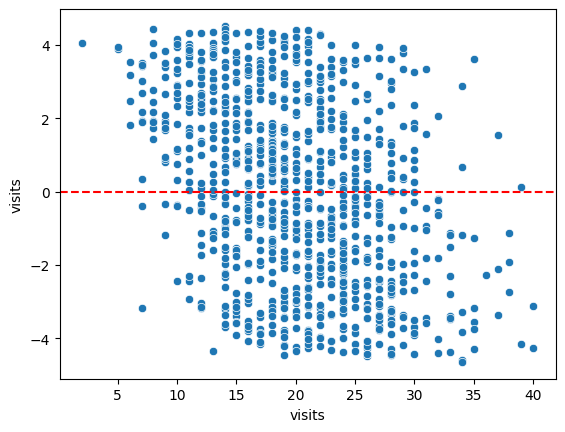

In [42]:
sns.scatterplot(x= y, y= residuals)
plt.axhline(y= 0, color= "r", ls= "--")

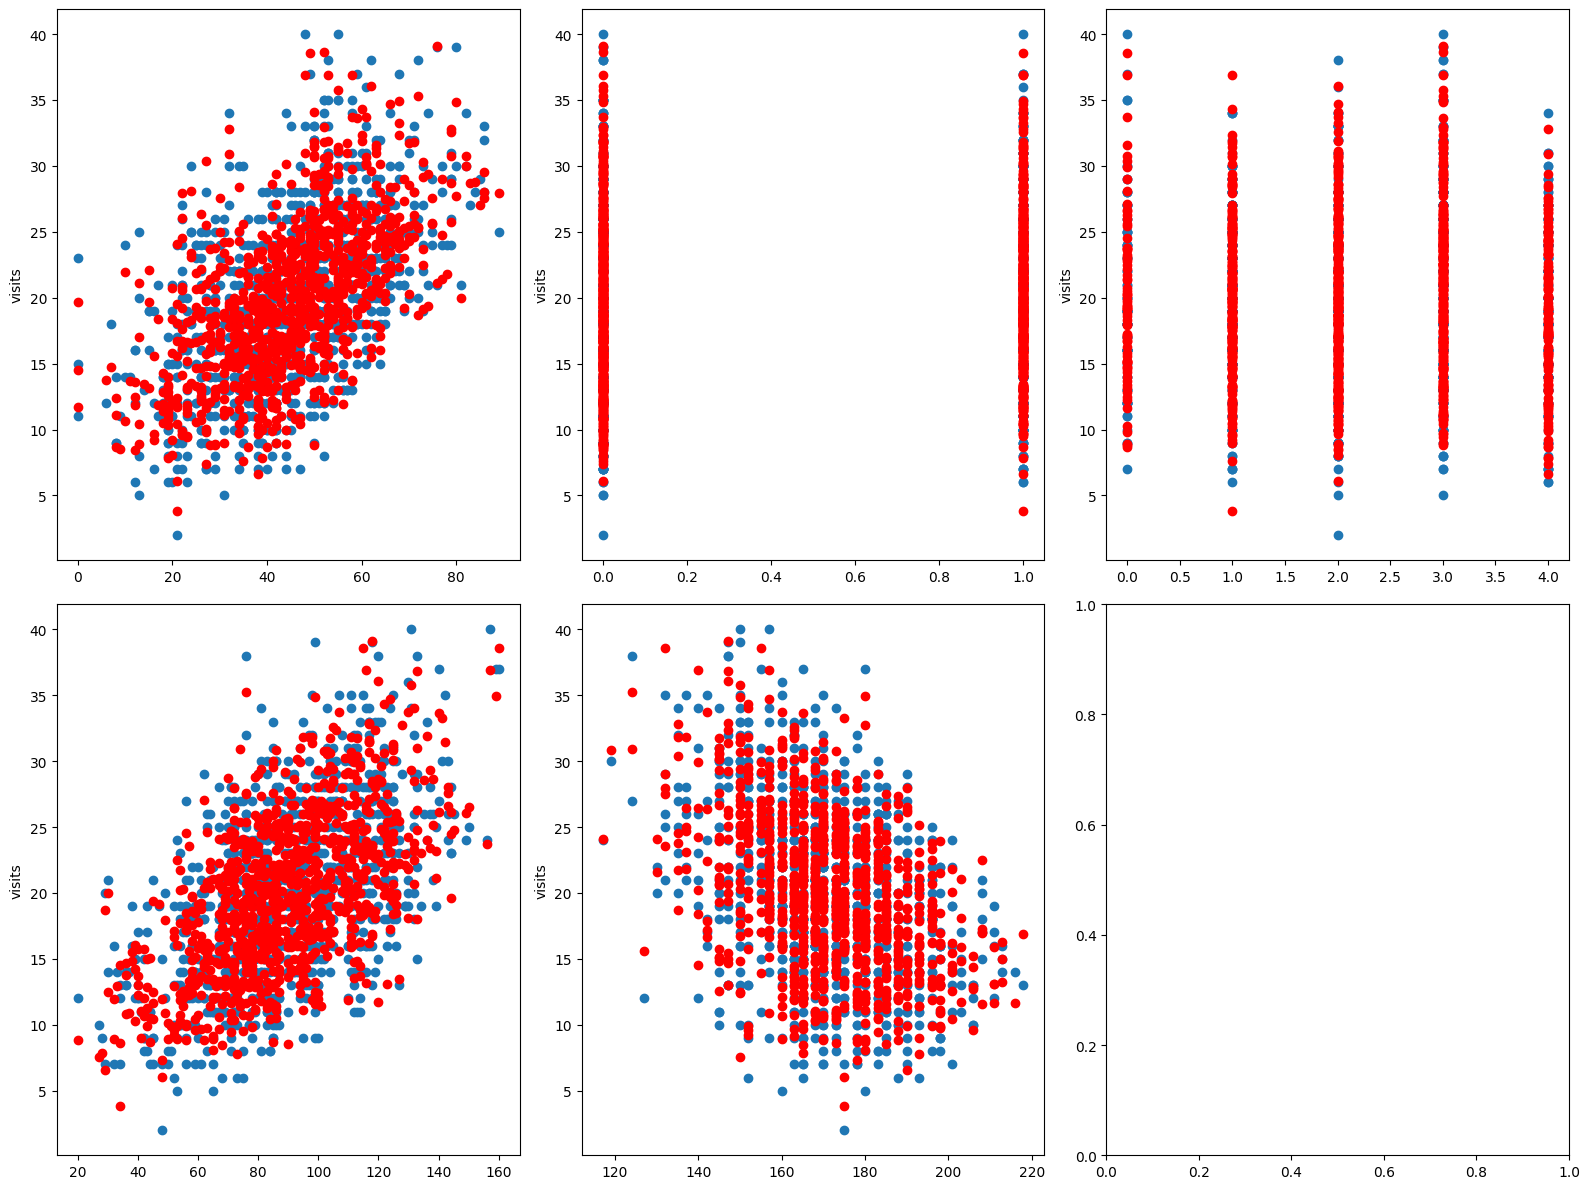

In [43]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['age'],df['visits'],'o')
axes[0,0].plot(df['age'],y_hat,'o',color='red')
axes[0,0].set_ylabel("visits")

axes[0,1].plot(df['gender'],df['visits'],'o')
axes[0,1].plot(df['gender'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['race/ethnicity'],df['visits'],'o')
axes[0,2].plot(df['race/ethnicity'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['weight'],df['visits'],'o')
axes[1,0].plot(df['weight'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['height'],df['visits'],'o')
axes[1,1].plot(df['height'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

plt.tight_layout();